In [ ]:
# A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From The Years 2013 And 2014.
# The Following Is The College Placements Data Compiled Over 2 years. Use This Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.
# Perform Extensive EDAs And Bring Out Insights.
# Build A Robust Model Using ML Techniques Or Neural Networks. Use Multiple Algorithms.

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.shape

(2966, 8)

In [5]:
df.duplicated().sum()

1829

In [6]:
df.drop_duplicates(inplace=True)
print(df.shape)

(1137, 8)


In [7]:
x=list(df.columns)
print(x)

['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs', 'PlacedOrNot']


In [8]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,21.641161,0.851363,6.988566,0.335092,0.296394,0.579595
std,1.715606,0.831743,1.067630,0.472230,0.456868,0.493841
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,1.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [9]:
def count_plot(x):
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    
    for i in range(1,len(x)):
        plt.subplot(2,4,i)
        plt.xticks(rotation=90)
        sns.countplot(df[x[i]],hue=df['PlacedOrNot'])

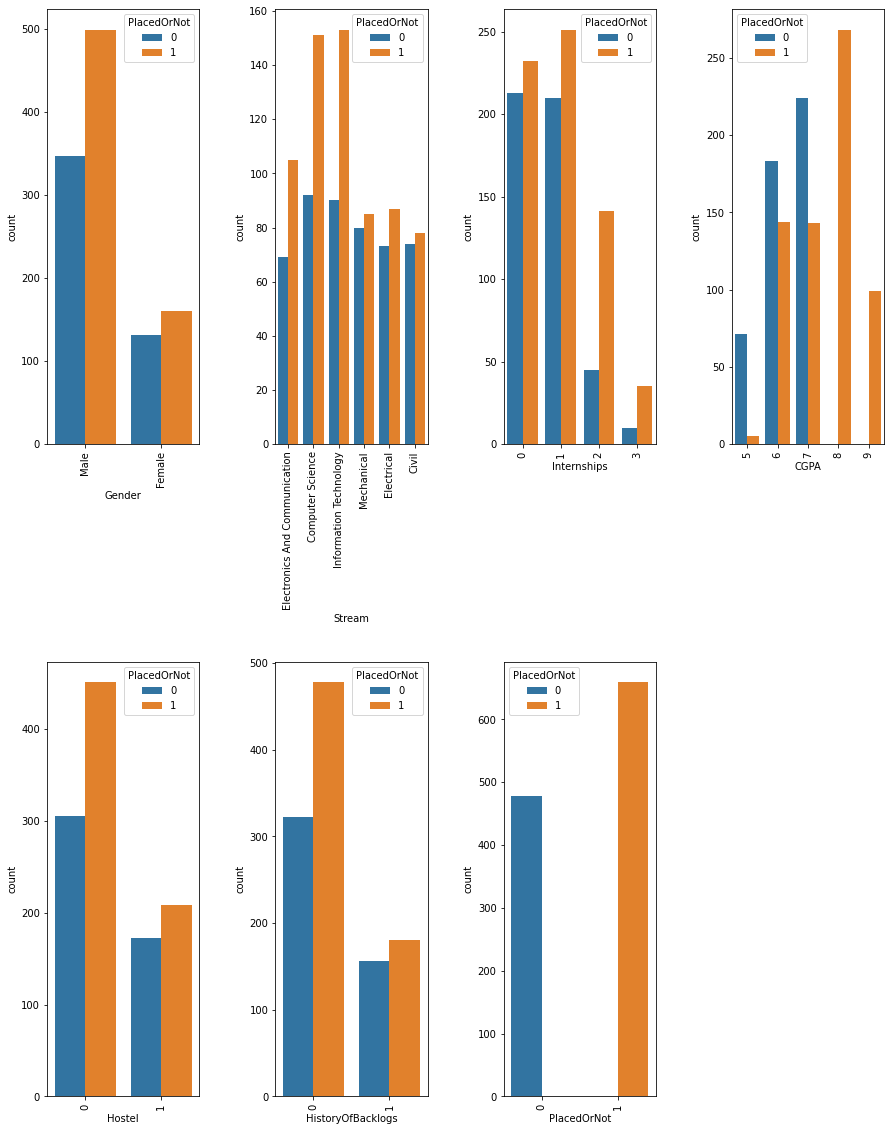

In [10]:
count_plot(x)

<Axes: ylabel='Age'>

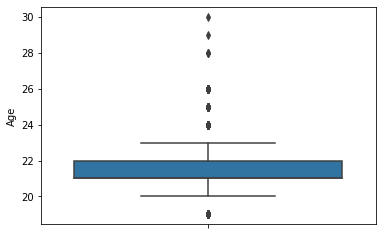

In [11]:
sns.boxplot(y=df['Age'])

In [12]:
df['PlacedOrNot'].value_counts()

1    659
0    478
Name: PlacedOrNot, dtype: int64

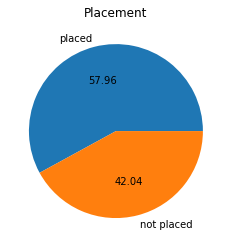

In [13]:
plt.pie(labels=['placed','not placed'],x=df['PlacedOrNot'].value_counts(),autopct='%0.2f')
plt.title('Placement')
plt.show()

In [14]:
# placed and having backlogs ,placed and not having baclogs

a=len(df[(df['PlacedOrNot']==1)  & (df['HistoryOfBacklogs']==1)])
b=len(df[(df['PlacedOrNot']==1)  & (df['HistoryOfBacklogs']==0)])
c=len(df[(df['PlacedOrNot']==1)])
         
print(a)
print(b)
print(c)

181
478
659


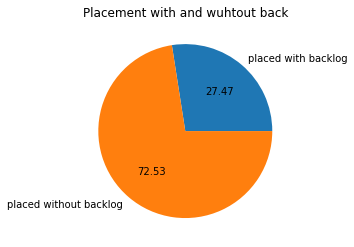

In [15]:
plt.pie(labels=['placed with backlog','placed without backlog'],x=[a,b],autopct='%0.2f')
plt.title('Placement with and wuhtout back')
plt.show()

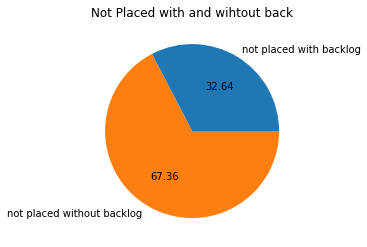

In [16]:
x=len(df[(df['PlacedOrNot']==0)  & (df['HistoryOfBacklogs']==1)])
y=len(df[(df['PlacedOrNot']==0)  & (df['HistoryOfBacklogs']==0)])
z=len(df[(df['PlacedOrNot']==0)])
         
# print(a)
# print(b)
# print(c)

plt.pie(labels=['not placed with backlog','not placed without backlog'],x=[x,y],autopct='%0.2f')
plt.title('Not Placed with and wihtout back')
plt.show()

In [ ]:
# not placed without backlog with CGPA

In [17]:
x=df[(df['PlacedOrNot']==0)  & (df['HistoryOfBacklogs']==0)]
x['CGPA'].value_counts()

7    153
6    112
5     57
Name: CGPA, dtype: int64

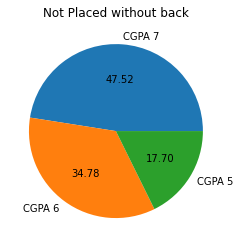

In [18]:
plt.pie(labels=['CGPA 7','CGPA 6','CGPA 5'],x=x['CGPA'].value_counts().values,autopct='%0.2f')
plt.title('Not Placed without back')
plt.show()

In [ ]:
# visual for placed not paced wrt streams

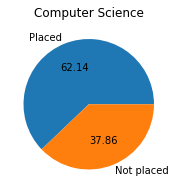

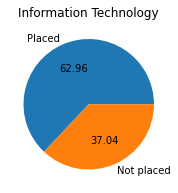

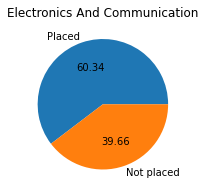

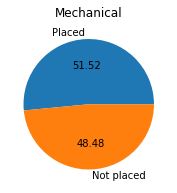

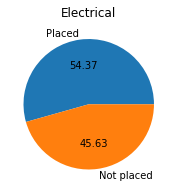

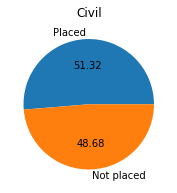

In [20]:
c=df['Stream'].value_counts().index
for i in range(len(c)):
    b=df.groupby(by='Stream')
    y=b.get_group(c[i])['PlacedOrNot'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['Placed','Not placed'],x=y.values,autopct='%.2f')
    plt.title(f'{c[i]}')
    plt.show()

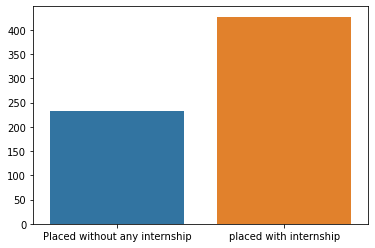

In [19]:
a=len(df[(df['PlacedOrNot']==1)  & (df['Internships']==0)])
b=len(df[(df['PlacedOrNot']==1)  & (df['Internships']>0)])
c=len(df[(df['PlacedOrNot']==1)])

sns.barplot(y=[a,b],x=['Placed without any internship', 'placed with internship'])
plt.show()

In [27]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


<Axes: >

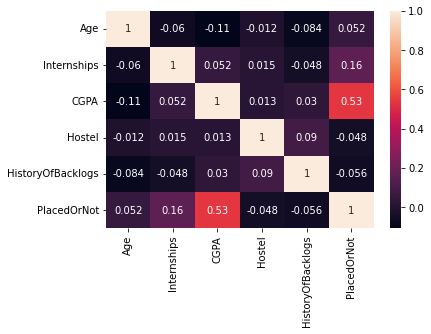

In [28]:
sns.heatmap(data=df.corr(),annot=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

cols=['Gender','Stream']

df[cols]=df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [30]:
x=df.drop('PlacedOrNot',axis=1).values
y=df['PlacedOrNot'].values

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

y_pred_train=log_reg.predict(x_train)

y_pred_test=log_reg.predict(x_test)

print('Test data report')

print(metrics.classification_report(y_test,y_pred_test))

print('Train data report')

print(metrics.classification_report(y_train,y_pred_train))

Test data report
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       100
           1       0.71      0.78      0.74       128

    accuracy                           0.70       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.70      0.70      0.69       228

Train data report
              precision    recall  f1-score   support

           0       0.69      0.64      0.66       378
           1       0.76      0.79      0.77       531

    accuracy                           0.73       909
   macro avg       0.72      0.72      0.72       909
weighted avg       0.73      0.73      0.73       909



[Text(0.5, 24.0, 'Predicted'), Text(24.0, 0.5, 'Actual')]

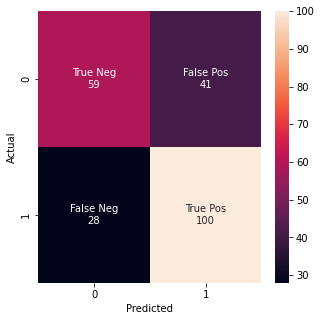

In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,5))
names = ['True Neg','False Pos','False Neg','True Pos']
measures = [str(value) for value in
                cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(names,measures)]
labels = np.asarray(labels).reshape(2,2)
s = sns.heatmap(cf_matrix, annot=labels,fmt='')
s.set(xlabel='Predicted', ylabel='Actual')

In [38]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

fit_dt=DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt=GridSearchCV(fit_dt,cv=15,param_grid=param_dist)

cv_dt.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [39]:
cv_dt.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 14}

In [40]:
y_pred=cv_dt.predict(x_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.90      0.73      0.81       128

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228



In [41]:
y_pred_train=cv_dt.predict(x_train)

print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       378
           1       0.97      0.75      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.87      0.84      0.84       909



In [42]:
from sklearn.ensemble import RandomForestClassifier
fit_rf=RandomForestClassifier(random_state=3)

param_dist = {'max_depth': [2,3,4,6,8],
              'criterion': ['gini', 'entropy'],
              'max_features':['auto','sqrt'],
              'oob_score':[True,False],
             'n_estimators':[10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=5,param_grid=param_dist)

cv_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 15, 20, 25, 30],
                         'oob_score': [True, False]})

In [43]:
y_pred=cv_rf.predict(x_test)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       100
           1       0.83      0.77      0.80       128

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



In [44]:
y_pred_train=cv_rf.predict(x_train)

print(metrics.classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       378
           1       0.95      0.78      0.85       531

    accuracy                           0.84       909
   macro avg       0.85      0.86      0.84       909
weighted avg       0.86      0.84      0.84       909



In [45]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

error=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train,y_train,cv=5)
    error.append(1-score.mean())

Text(0, 0.5, 'Error')

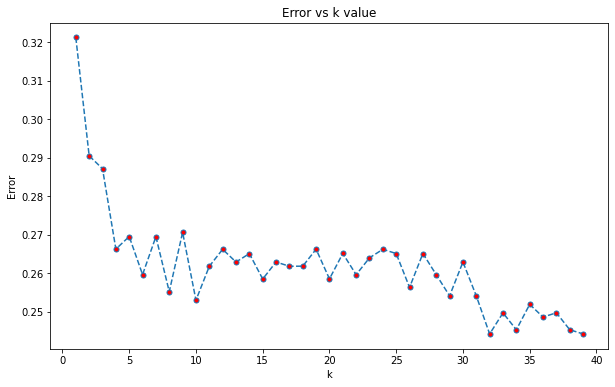

In [46]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40), error, linestyle='--', marker='o', markerfacecolor='red', markersize=5)

plt.title('Error vs k value')

plt.xlabel('k')

plt.ylabel('Error')

In [47]:
knn=KNeighborsClassifier(n_neighbors=17)

knn.fit(x_train,y_train)

pred=knn.predict(x_test)

print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       100
           1       0.78      0.77      0.77       128

    accuracy                           0.75       228
   macro avg       0.74      0.74      0.74       228
weighted avg       0.75      0.75      0.75       228



In [48]:
scores=cross_val_score(cv_dt,x,y,cv=15)
scores.mean()

0.8241988304093567

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ada=AdaBoostClassifier(random_state=17,n_estimators=20)

ada.fit(x_train,y_train)

pred=ada.predict(x_test)

print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       100
           1       0.84      0.76      0.80       128

    accuracy                           0.78       228
   macro avg       0.78      0.78      0.78       228
weighted avg       0.79      0.78      0.78       228



In [53]:
from sklearn.model_selection import RandomizedSearchCV

fit_dt=DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2, 3, 4,5,6,7,8],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,16,18]}

cv_dt=RandomizedSearchCV(fit_dt,cv=20,param_distributions=param_dist)

cv_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=17),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'max_leaf_nodes': [4, 6, 8, 10, 12, 16,
                                                           18]})

In [54]:
y_pred=cv_dt.predict(x_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80       100
           1       0.90      0.73      0.81       128

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.82      0.80      0.80       228



In [55]:
x_train.shape

(909, 7)

In [56]:
x_test.shape

(228, 7)